In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
salary_data = pd.read_csv('Salary_Data.csv')

In [5]:
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
salary_data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

# Scatter Plot

<Axes: xlabel='YearsExperience', ylabel='Salary'>

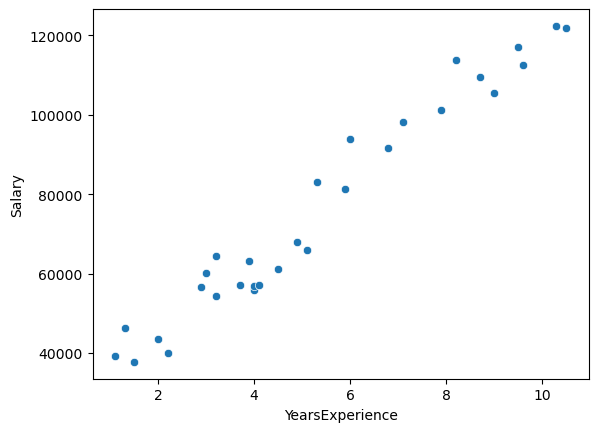

In [7]:
sns.scatterplot(x=salary_data['YearsExperience'],y=salary_data['Salary'])

In [9]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [11]:
X = salary_data.YearsExperience
y = salary_data.Salary

# Predicting Without Transformation

In [10]:
import statsmodels.formula.api as smf

In [12]:
ols = smf.ols('y~X',data=salary_data)

In [13]:
model = ols.fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.14e-20
Time:                        12:55:11   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
X           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Got the R-squared: 0.957 and Adj. R-squared: 0.955 ,which is quite good

In [16]:
Y = 9449.9623*X+2.579e+04

Text(0, 0.5, 'Salary')

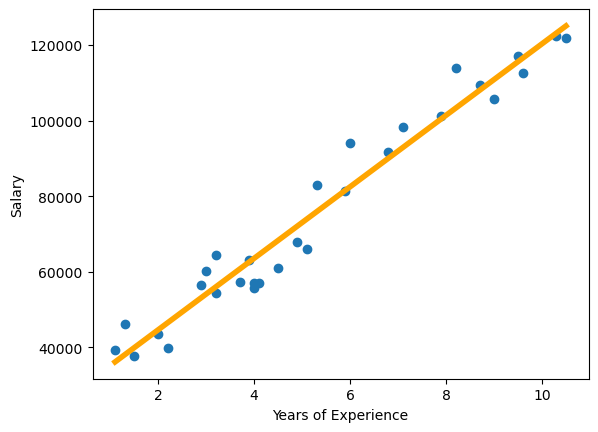

In [20]:
plt.scatter(X,y)
plt.plot(X,Y,lw=4,c='orange',label = 'Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Regression line is also covering majority of points with minimal errors

# Square root Transformation

In [21]:
sqrt_year = np.sqrt(X)
sqrt_salary = np.sqrt(y)

In [22]:
ols1 = smf.ols('sqrt_salary~sqrt_year',data=salary_data)

In [23]:
model1 = ols1.fit()

In [24]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqrt_salary   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           7.58e-19
Time:                        13:07:09   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    103.5680      8.178     12.663      0.000      86.815     120.321
sqrt_year     75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Got the R-squared: 0.942 and Adj. R-squared: 0.940.As we can see r2 score and Adj.R-squared has been downgraded after the transformation

In [1]:
## Cube root transformation

In [25]:
cbrt_year = np.cbrt(X)
cbrt_salary = np.cbrt(y)

In [26]:
ols2 = smf.ols('cbrt_salary~cbrt_year',data=salary_data)

In [27]:
model2= ols2.fit()

In [28]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            cbrt_salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           6.37e-18
Time:                        13:08:58   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.6603      1.300     12.811      0.000      13.996      19.324
cbrt_year     14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
log_year = np.log(X)
log_salary = np.log(y)

In [32]:
ols3 = smf.ols('log_salary~log_year',data=salary_data)

In [33]:
model3 = ols3.fit()

In [34]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           7.40e-16
Time:                        13:10:59   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0.056    184.868      0.000      10.214      10.442
log_year       0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Transformation is not needed for this data .As the R2 score and Adj.R2 score is getting lower and lower after the transformation.

In [38]:
a= model.predict(salary_data[['Salary']])

# Lets make a Dataframe of predicted Salary 

In [39]:
df= pd.DataFrame(salary_data)
df['Predicted Salary'] = a

In [40]:
df

,YearsExperience,Salary,Predicted Salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
